#  **<<< Only Problem 2 and 4 will be graded >>>**


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

## Problem 1
Find the Fourier series of the following periodic function \\
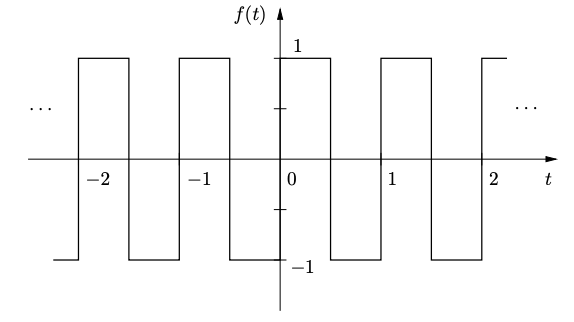

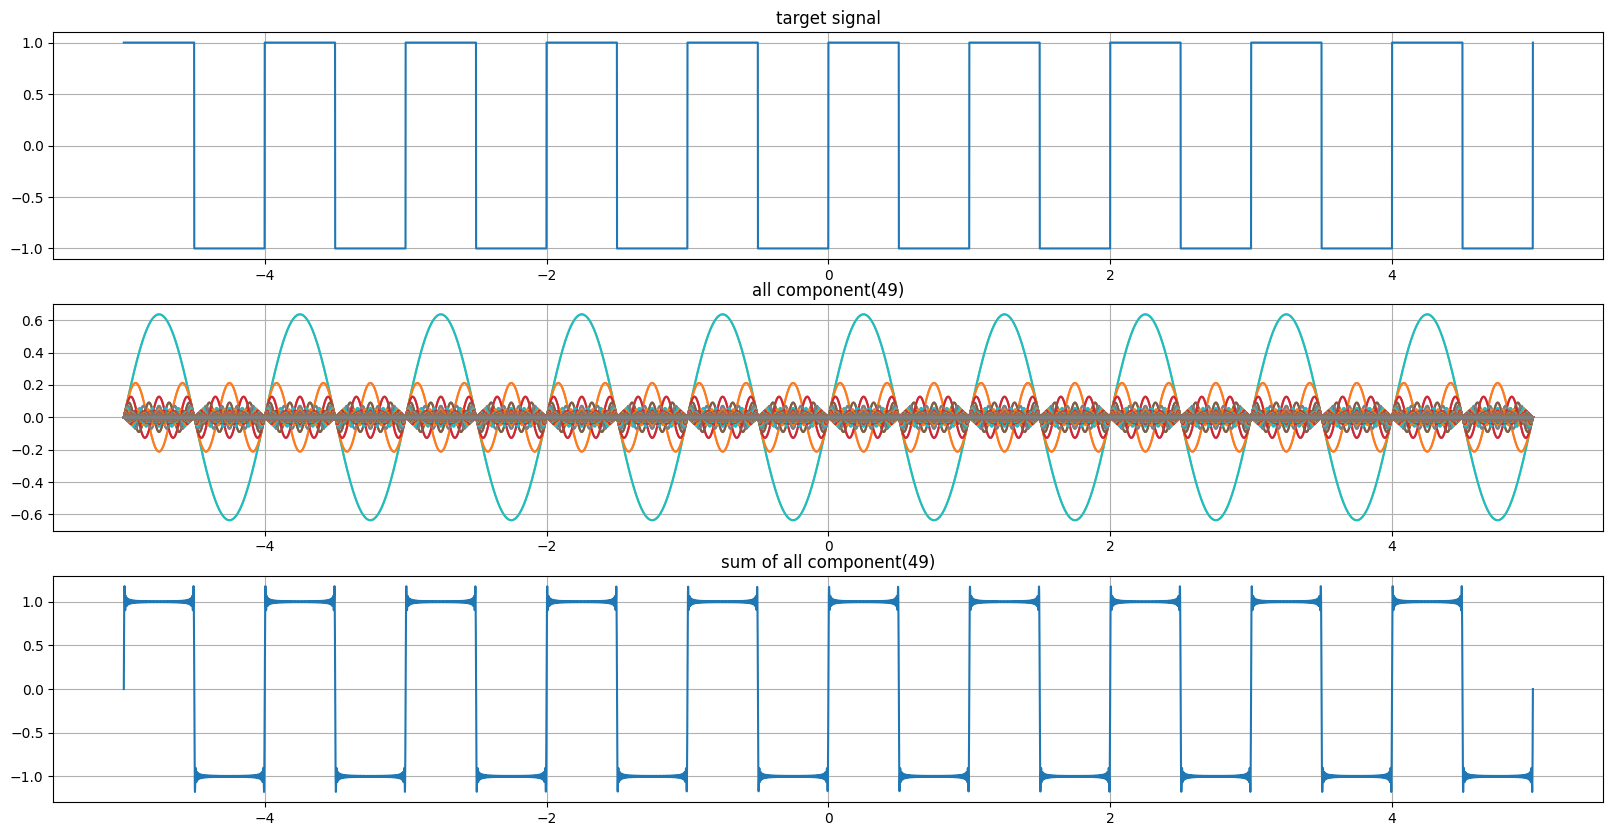

In [18]:
MIN_V = -5
MAX_V = 5
t = np.linspace(MIN_V, MAX_V, (MAX_V-MIN_V)*1000)
x_t = np.array(t)

for i in range(MIN_V-1, MAX_V+1):
    x_t[(t>=i) & (t<(i+0.5))] = 1
    x_t[(t>=(i+0.5)) & (t<(i+1))] = -1

N = 99
components = []
T = 1
omega_0 = 2*np.pi / T
for n in range(-N, N+1):
    if n == 0:
         continue
    a_n = np.array(t)
    a_n = np.divide(np.cos(n*np.pi) - 1,
                    -1j*n*np.pi)
    component = a_n * np.exp(1j*n*omega_0*t)
    components.append(component)
    

def show_compoments(t,
                    x_t,
                    components,
                    title_list = ['target signal', 'all component', 'sum of all component'],
                    save_name = 'Untitled.png'):
    
    sum_compoment = np.zeros_like(t, dtype= np.complex128)

    plt.figure(figsize=(20, 10))
    plt.subplot(3, 1, 1)
    plt.title(title_list[0])
    plt.plot(t, x_t)
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.title(title_list[1])
    for idx, c in enumerate(components):
        plt.plot(t, np.real(c), label = f'Comp. {idx}')
        sum_compoment += c
    plt.grid()
    if len(components) <= 10:
        plt.legend()

    plt.subplot(3, 1, 3)
    plt.title(title_list[2])
    plt.plot(t, np.real(sum_compoment))
    plt.grid()

    plt.savefig(save_name)

show_compoments(t,
                x_t,
                components,
                title_list=['target signal', f'all component({N//2})', f'sum of all component({N//2})'],
                save_name='Problem 1.png')

## Problem 2

Find th Fourier Series (FS) of the periodic function $ x(t) $ which are provided as follows.


1. $ x(t) = \frac{\pi t^3}{2} ; -1 < t < 1$
2. $ x(t) = \pi - x; -\pi <= x <= \pi$
3. $ x(t) = t^2 + \sin^3(\pi t) ; -1 <= t <= 1$

In [19]:
MIN_V = -5
MAX_V = 5
t = np.linspace(MIN_V, MAX_V, (MAX_V - MIN_V)*1000)

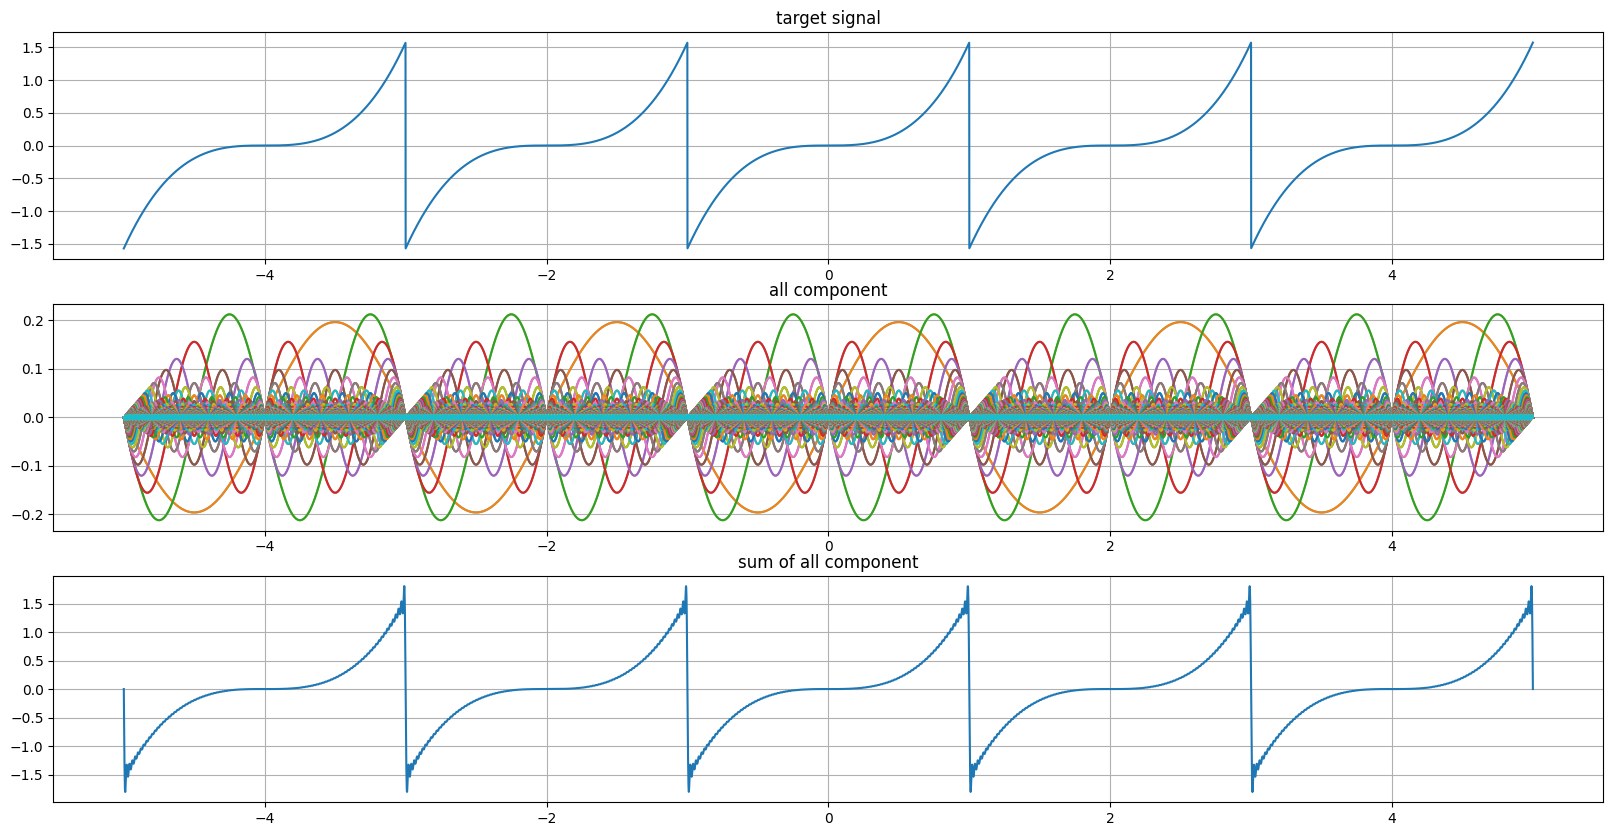

In [20]:
'''
problem 2.1
'''

def x1_t(t):
    if t < -1:
        return x1_t(t+2)
    elif t > 1:
        return x1_t(t-2)
    return (np.pi * t**3) / 2

x1_t = np.vectorize(x1_t)(t)
components = []
N = 100
for n in range(-N, N):
    try:
        a_n = np.divide(1j*np.pi*n*(np.pi**2*n**2-6)*np.cos(np.pi*n) - 3*(np.pi**2*n**2-2)*np.sin(np.pi*n),
                        2*np.pi**3*(n+1e-10)**4)
        component = a_n * np.exp(1j*n*np.pi*t)
        components.append(component)
    except:
        print(f'n = {n} is skipped -> divided by zero')

show_compoments(t,
                x1_t,
                components,
                save_name='Problem 2.1.png')

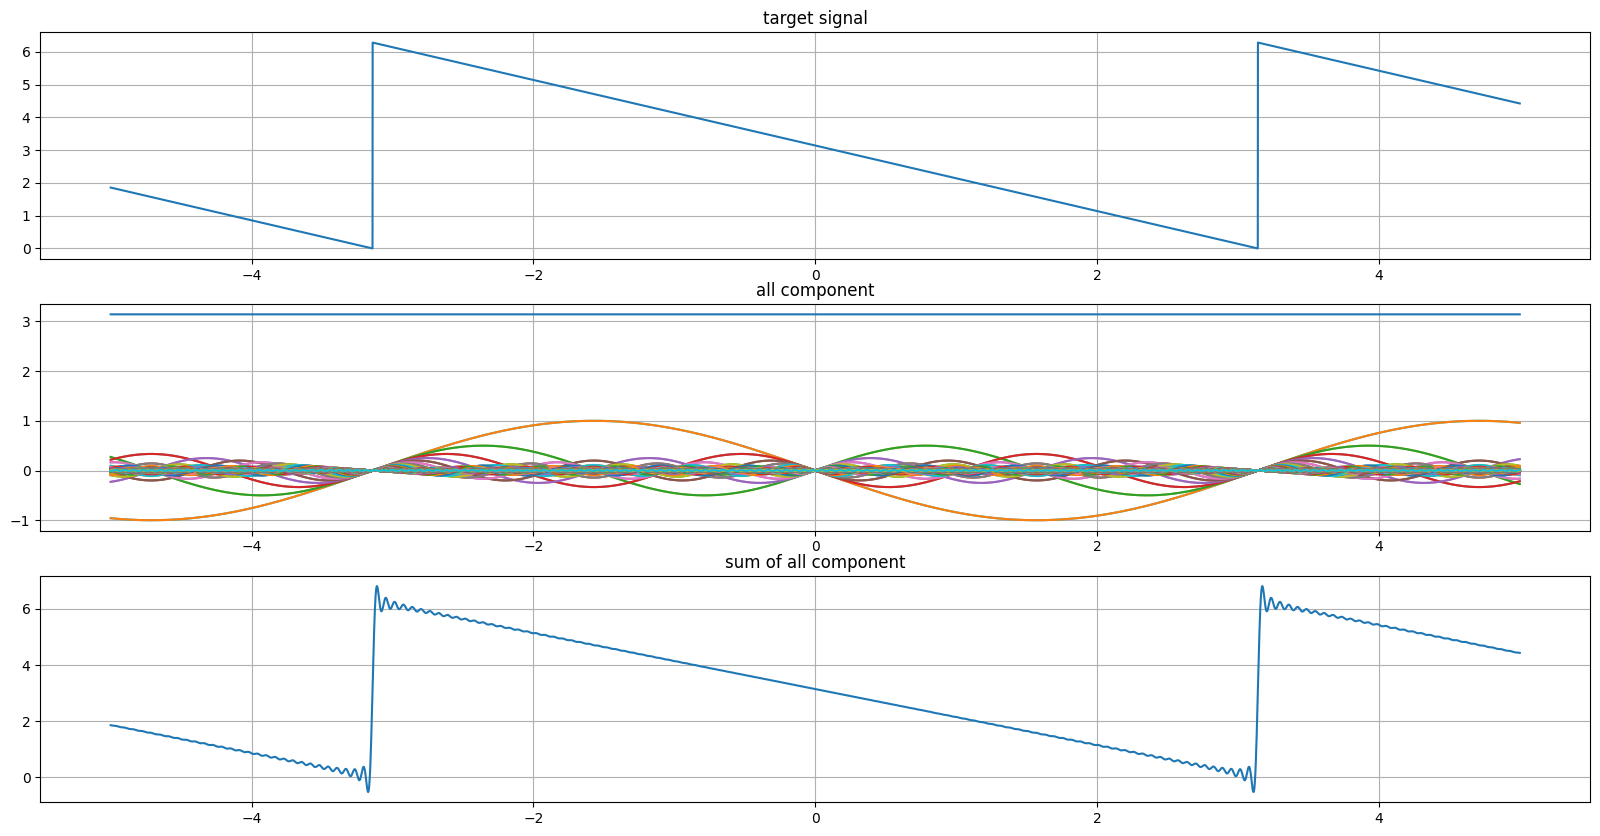

In [21]:
'''
problem 2.2
'''

def x2_t(t):
    if t < -np.pi:
        return x2_t(t+2*np.pi)
    elif t > np.pi:
        return x2_t(t-2*np.pi)
    return np.pi-t

x2_t = np.vectorize(x2_t)(t)
components = []

N = 100
omega_0 = 1
for n in range(-N, N):
    n += 1e-10
    try:
        a_n = np.sin(n*np.pi)/n \
            + (1/(1j*n))*np.cos(n*np.pi) \
            - (1/(np.pi*1j*n**2))*np.sin(n*np.pi)
        component = a_n * np.exp(1j*n*omega_0*t)
        components.append(component)
    except ZeroDivisionError:
        print(f'n = {n} is skipped -> divided by zero')
        continue

show_compoments(t,
                x2_t,
                components,
                save_name='Problem 2.2.png')

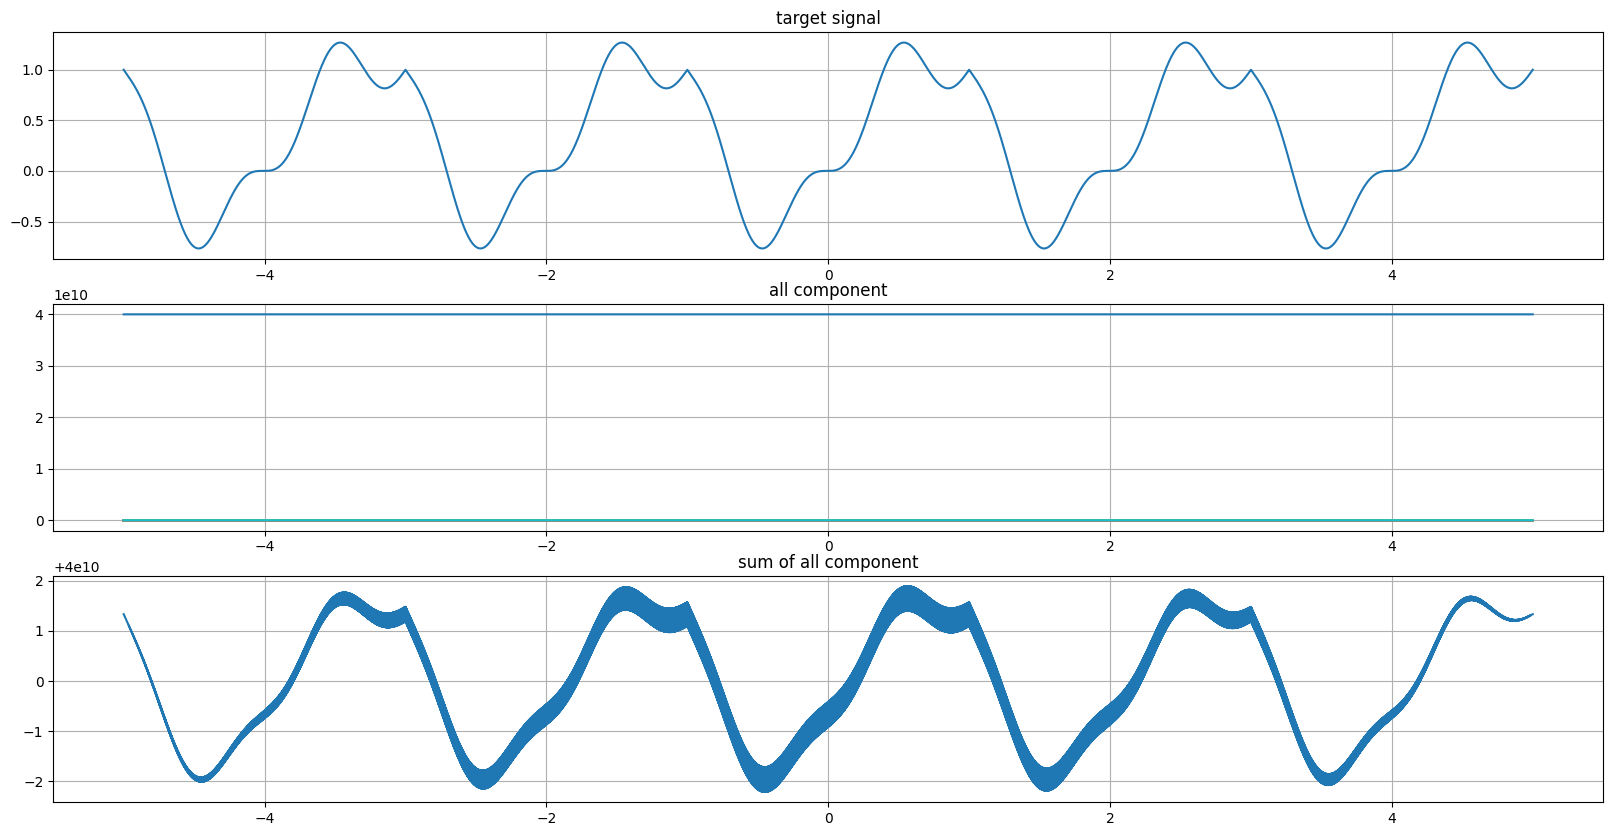

In [30]:
'''
problem 2.3
'''

def x3_t(t):
    if t>1:
        return x3_t(t-2)
    elif t<-1:
        return x3_t(t+2)
    return t**2 + np.sin(np.pi*t)**3

x3_t = np.vectorize(x3_t)(t)
components = []

N = 1000
omega_0 = np.pi

for n in range(-N, N):
    # t^2 part
    a_n = np.divide(2, n*np.pi+1e-10)*np.sin(n*np.pi) -\
          np.divide(4, n**3*np.pi**3+1e-10)*np.sin(n*np.pi) +\
          np.divide(4, n**2*np.pi**2+1e-10)*np.cos(n*np.pi)
    # sin^3(pi * t) part
    a_n += ((-1j/(4*np.pi))*(np.divide(np.sin(np.pi*(3-n)), 3-n+1e-10) -\
                           3*np.divide(np.pi*(1-n), 1-n+1e-10) +\
                           3*np.divide(np.pi*(1+n), 1+n+1e-10) -\
                           np.divide(np.pi*(3+n), 3+n+1e-10)))
    # a_n /= 2
    component = a_n * np.exp(1j*n*omega_0*t)
    components.append(component)


show_compoments(t,
                x3_t,
                components,
                save_name='Problem 2.3.png')

## Problem 3
Find the Fourier tranform of the following signals in terms of $X(j\omega)$, the Fourier tranform of $x(t)$
$ \left( \mathscr{F} \left\{ x(t) \right\} = X(j\omega) \right)  $

1. $x(-t)$
2. $x_e(t) = \frac{x(t) + x(-t)}{2}$
3. $x_o(t) = \frac{x(t) - x(-t)}{2}$

## Problem 4
Let $  \mathscr{F} \left\{ x(t) \right\} = X(j\omega) = \textrm{rect} \left[ (\omega-1)/2\right]  $. Find Fourier tranform of

1. $x(-2t+4)$
2. $(t-1)x(t-1)$
3. $ t\frac{dx(t)}{dt}$
4. $ x(2t-1)\exp[-j2t]$
5. $ x(t)*x(t-1)$


## Problem 5.1
### Proof

$ \mathscr{F} \left\{ e^{-|t|} \right\} = \mathscr{F} \left\{ exp(-|t|) \right\} = \frac{2}{\omega^2+1}$

## Problem 5.2

Using the outcome obtained in Problem 5.1, Find the Fourier Transform of the given equation.

1. $\frac{d}{dt} (e^{-|t|})$
2. $ exp(3t-|2t+2|)$
2. $ \frac{1}{2\pi t^2 + 1}$


## Problem 6

For each of the following Fourier transform ($X(j\omega)$),
use Fourier transform properties to determine the corresponding time-domain signal ($x(t)$)

1. $X(j\omega) = u(\omega) - u(\omega -2)$
2. $X(j\omega) = \cos(2\omega)\sin \left(\frac{\omega}{2} \right)$

## Problem 7

Proof

$\int_{-\infty}^{\infty} {|x(t)|}^2 dt = \frac{1}{2\pi} \int_{-\infty}^{ \infty } |X(j\omega)|^2 d\omega$

## Problem 8



Determine a signal $x(t)$ which has its Fourier transform

$X(j\omega) = \delta(\omega)-\delta(\omega-a_0\pi)-\delta(\omega-a_1)$

and the impulse response in time-domain is  $h(t) = u(t) - u(t-2b_0)$



1.   Show how to find $x(t)$ and determine whether it is periodic?
2.   Show how to find $y(t) = x(t) * h(t) $ and determine whether it is periodic?

Verify you results by sketching $x(t)$, $h(t)$, $y(t)$, $X(j\omega)$, $H(j\omega)$ and $Y(j\omega)$. Note that for the complex number, plot only its magnitude.










